In [419]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [420]:
from DataManipulation import reshape_signal
from sklearn.model_selection import train_test_split
from scipy.signal import envelope
from sklearn.preprocessing import StandardScaler

In [421]:
Data = pd.read_csv('Data.csv')

In [422]:
# Data.columns[-6]
# Data.columns[-5]
Data.columns

Index(['Unnamed: 0', '/'SamplingRate50000Time100sGaussianWalk'/'Dev1/ai0'',
       '/'SamplingRate50000Time100sGaussianWalk'/'Dev1/ai1'',
       '/'SamplingRate50000Time100smultisine'/'Dev1/ai0'',
       '/'SamplingRate50000Time100smultisine'/'Dev1/ai1'',
       '/'SamplingRate50000Time100ssquare_wave'/'Dev1/ai0'',
       '/'SamplingRate50000Time100ssquare_wave'/'Dev1/ai1'',
       '/'SamplingRate50000Time100ssine_wawe'/'Dev1/ai0'',
       '/'SamplingRate50000Time100ssine_wawe'/'Dev1/ai1'',
       '/'SamplingRate50000Time100sGaussianWalk #1'/'Dev1/ai0'',
       '/'SamplingRate50000Time100sGaussianWalk #1'/'Dev1/ai1'',
       '/'SamplingRate50000Time100smultisine #1'/'Dev1/ai0'',
       '/'SamplingRate50000Time100smultisine #1'/'Dev1/ai1'',
       '/'SamplingRate50000Time100sOUprocess'/'Dev1/ai0'',
       '/'SamplingRate50000Time100sOUprocess'/'Dev1/ai1'',
       '/'SamplingRate50000Time100ssquare_wave #1'/'Dev1/ai0'',
       '/'SamplingRate50000Time100ssquare_wave #1'/'Dev1/ai1'',
    

In [423]:
Columns_Y = '/\'SamplingRate50000Time100sOUprocess\'/\'Dev1/ai1\''
Columns_X = '/\'SamplingRate50000Time100sOUprocess\'/\'Dev1/ai0\''

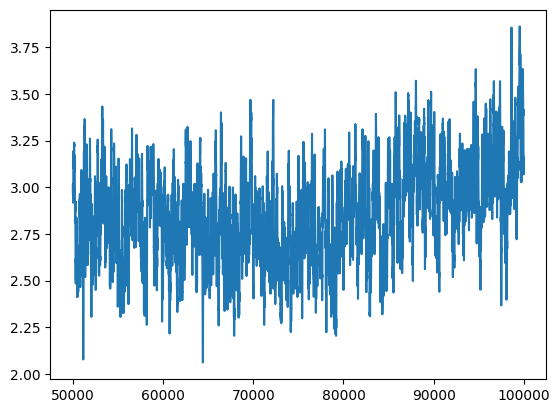

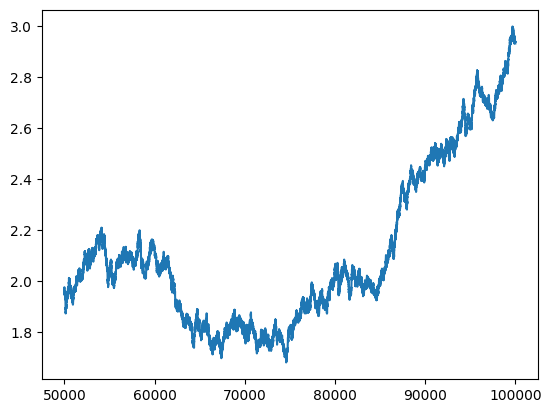

In [424]:
plt.plot(Data[Columns_X][50000:100000])
plt.show()
plt.plot(Data[Columns_Y][50000:100000])
int(len(Data.index)/5000)
np.array(Data[Columns_Y])
X = reshape_signal(np.array(Data[Columns_X]), int(len(Data.index)/50000))
Y = reshape_signal(np.array(Data[Columns_Y]), int(len(Data.index)/50000))

In [425]:
# filenames = pd.read_csv('Downsampled_data/file_names_downsampled_data.csv')

In [426]:
# filenames['filenames_RF'] = filenames['filenames_RF'].apply(lambda x: x.replace("\\", "/"))
# filenames['filenames_lock_in'] = filenames['filenames_lock_in'].apply(lambda x: x.replace("\\", "/"))


In [427]:
# import os
# folder = '2025-05-08 - Christian ML DAQ'
# filenames = [x for x in os.listdir(folder) if x.endswith('.npy')]
# filenames.sort()
# square_names = [x for x in filenames if x[11:].startswith('Square')]
# # square_names
# # square_names[11:]
# # len(square_names)

In [428]:
# np.arange(10)[:3]

In [429]:
# print(os.path.join('2025-05-08 - Christian ML DAQ', square_names[0]))

In [430]:
# # num_samples = int(np.load(os.path.join(folder, square_names[0])).shape[0]/5000)  # Number of samples to train on.

# Xs, Ys = [], []

# for file in square_names[int(len(square_names)/2):]:
#     loaded_file = np.load(os.path.join(folder, file))
#     Xs.append(reshape_signal(loaded_file, int(loaded_file.shape[0]/5000)))

# for file in square_names[:int(len(square_names)/2)]:
#     loaded_file = np.load(os.path.join(folder, file))
#     # x_env, x_res = envelope(loaded_file)
#     Ys.append(reshape_signal(loaded_file, int(loaded_file.shape[0]/5000)))

In [431]:
# #Not the same len???
# for i in range(len(Ys)):
#     Ys[i] = Ys[i][:Xs[i].shape[0]]
#     print(Ys[i].shape[0])
#     print(Xs[i].shape[0])


In [432]:
# for file in square_names:
    # print(np.load(os.path.join(folder, file)).shape)
    # plt.plot(np.load(os.path.join(folder, file))[:10000])
    # plt.title(file)
    # plt.show()



In [433]:
# num_samples = int(np.load(filenames['filenames_RF'][0] + ".npy")[0].shape[0]/5000)  # Number of samples to train on.
#

In [434]:
# Xs, Ys = [], []

# for file in filenames['filenames_RF']:
#     loaded_file = np.load(file + ".npy")[0]
#     Xs.append(reshape_signal(loaded_file, num_samples))

# for file in filenames['filenames_lock_in']:
#     loaded_file = np.load(file + ".npy")[0]
#     x_env, x_res = envelope(loaded_file)
#     Ys.append(reshape_signal(x_env + x_res, num_samples))


In [435]:
# X = np.vstack(Xs)
# Y = np.vstack(Ys)

X = StandardScaler().fit_transform(X)
Y = StandardScaler().fit_transform(Y)

X = np.expand_dims(X, axis = 2)
Y = np.expand_dims(Y, axis = 2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

num_encoder_tokens = X.shape[1]
num_decoder_tokens = Y.shape[1]

In [436]:
X_train.shape

(80, 50000, 1)

In [437]:
from LSTM_train_model import *

In [438]:
latent_dim = 128

In [439]:
encoder_inputs = tf.keras.Input(shape=(num_encoder_tokens, 1))
encoder = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = tf.keras.Input(shape=(num_decoder_tokens, 1))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(1, activation="linear")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [440]:
# history = Train_model(model_name="LSTM_manymultisine", 
#             X_train = X_train, Y_train = Y_train, 
#             num_encoder_tokens=X.shape[1], 
#             num_decoder_tokens=Y.shape[1], 
#             latent_dim = 150,  # Latent dimensionality of the encoding space.
#             epochs = 100,  # Number of epochs to train for.
#             batch_size = 200  # Batch size for training.
#             )

In [441]:
model_name="LSTM_OUprocess"
# model = tf.keras.models.load_model(model_name + ".keras")
#GlorotNormal 
# from keras.initializers import GlorotNormal
# initializer = GlorotNormal(seed=None)

batch_size = 20

# rng = np.random.default_rng()
# X_train_down = rng.choice(X_train, 200).astype("float32")
# Y_train_down = rng.choice(Y_train, 200).astype("float32")
# print(type(X_train_down[0][0][0]), type(Y_train_down[0][0][0]), type(np.zeros_like(Y_train_down, dtype="float32")[0][0][0]))

decay_steps = 3*X_train.shape[0]/batch_size
# initial_learning_rate = 0.1
# lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
#     initial_learning_rate, decay_steps)

initial_learning_rate = 0.001
warmup_steps = 1000
target_learning_rate = 0.01
lr_warmup_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, warmup_target=target_learning_rate,
    warmup_steps=warmup_steps
)



# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=X_train.shape[0]/batch_size,
#     decay_rate=0.9)


optimizer = tf.keras.optimizers.Adam(learning_rate=lr_warmup_decayed_fn)

model.compile(
    loss="mse", optimizer = optimizer
)
history = model.fit(
    [X_train, np.zeros_like(Y_train)],
    Y_train,
    batch_size=batch_size,
    epochs=100,
    validation_split=0.2,
    # TF_GPU_ALLOCATOR=tf.cuda_malloc_async
)
model.save(model_name + ".keras")


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: 0.8863 - val_loss: 1.5838
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 0.9884 - val_loss: 1.5837
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - loss: 0.9591 - val_loss: 1.5848
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 0.9829 - val_loss: 1.5866
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 0.9106 - val_loss: 1.5888
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 0.9283 - val_loss: 1.5894
Epoch 7/100


KeyboardInterrupt: 

In [ ]:
np.repeat(np.arange(10),2)

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9])

In [ ]:
X_train[:3000].shape
# np.random.Generator.choice(X_train)
rng = np.random.default_rng()
rng.choice(X_train, 3000)

array([[[-0.2328372 ],
        [-0.25320155],
        [-0.26882007],
        ...,
        [ 0.31972951],
        [ 0.30229946],
        [ 0.27900463]],

       [[-0.70919399],
        [-0.7407332 ],
        [-0.77486597],
        ...,
        [-1.12335663],
        [-1.11684421],
        [-1.10946951]],

       [[-0.81394995],
        [-0.80370895],
        [-0.8017607 ],
        ...,
        [-0.40499898],
        [-0.36232748],
        [-0.3175727 ]],

       ...,

       [[ 0.21803887],
        [ 0.22442432],
        [ 0.25067381],
        ...,
        [-0.52743834],
        [-0.48902409],
        [-0.45910932]],

       [[ 0.48063725],
        [ 0.49118745],
        [ 0.50900548],
        ...,
        [ 0.26098682],
        [ 0.25770784],
        [ 0.24432811]],

       [[ 0.68236388],
        [ 0.69922036],
        [ 0.70647007],
        ...,
        [ 0.94112858],
        [ 0.94498553],
        [ 0.95272053]]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


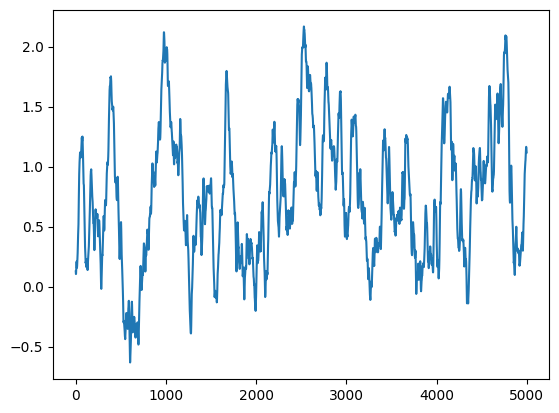

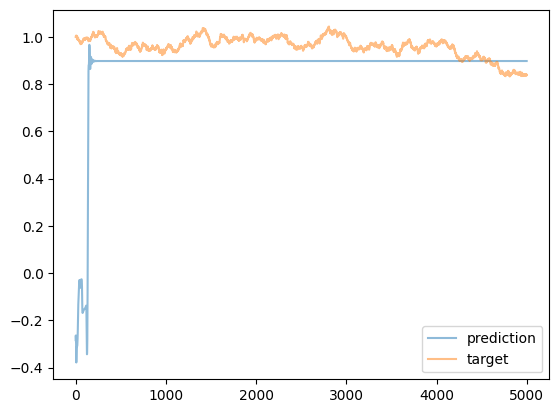

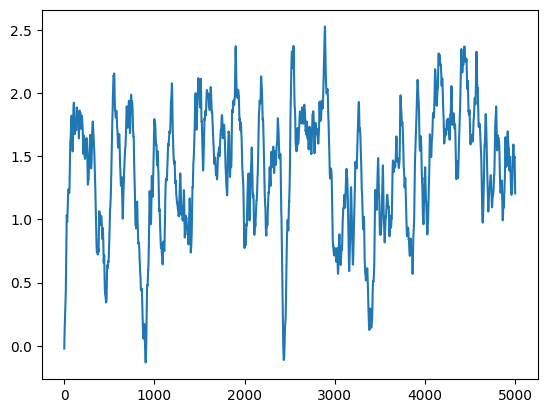

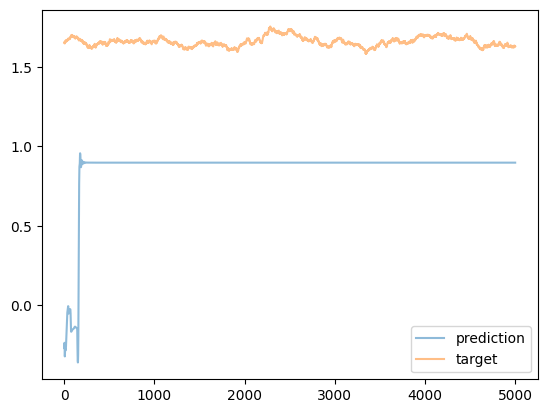

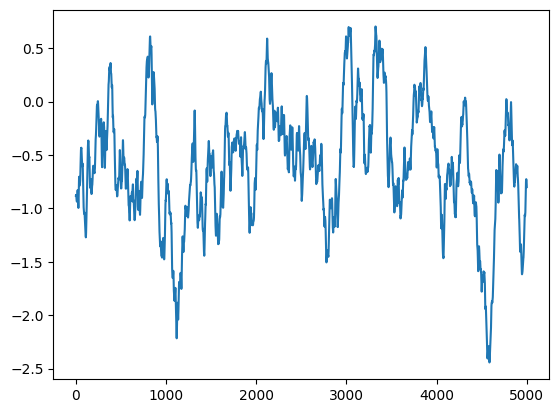

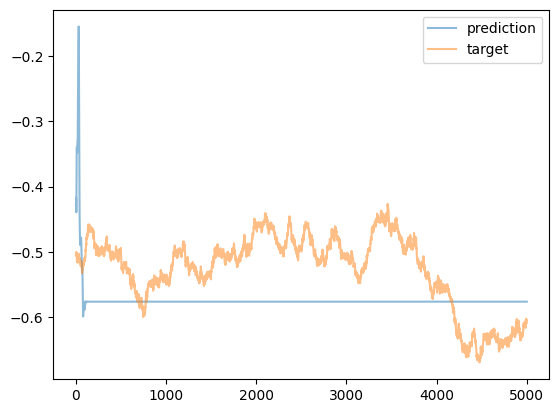

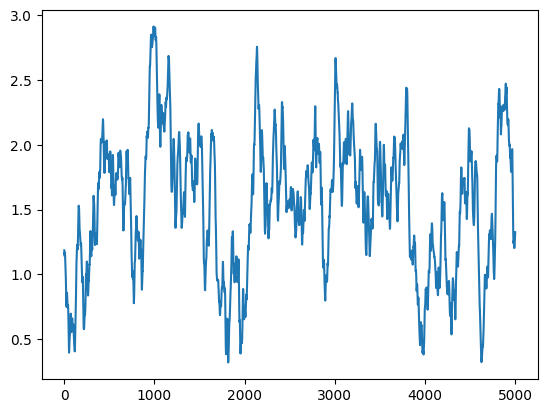

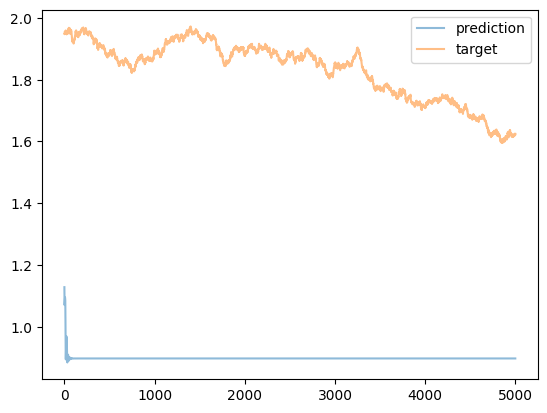

In [ ]:
PlotPredictions(model_name=model_name,
                X_test=X_train, Y_test=Y_train,
                test_index_min=10, test_index_max=14
                )

STANDARDIZE DATA